In [16]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

notebooks_dir = Path.cwd()
project_dir = notebooks_dir.parent
data_dir = project_dir / 'data' / 'raw'
text_data_path = data_dir / 'Subtask_2_train.json'
interim_dir = project_dir / 'data' / 'interim'
wav_data_path = interim_dir / 'train_wav' 

In [17]:
text_data = json.loads(text_data_path.read_text())
for i in range(len(text_data[0]['conversation'])):
    print(text_data[0]['conversation'][i])

{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral', 'video_name': 'dia1utt1.mp4'}
{'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral', 'video_name': 'dia1utt2.mp4'}
{'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise', 'video_name': 'dia1utt3.mp4'}
{'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise', 'video_name': 'dia1utt4.mp4'}
{'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger', 'video_name': 'dia1utt5.mp4'}
{'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral', 'video_name': 'dia1utt6.mp4'}
{'utterance_ID': 7, 'text': 'No .', 'speaker': 'Phoebe', 'emotion': 'neutral', 'video_name': 'dia1utt7.mp4'}

In [18]:
# extract wav paths and emotions
def get_wav_from_json(json_convo):
    wav = []
    emotions = []
    for line_idx in range(len(json_convo)):
        mp4_file = json_convo[line_idx]['video_name']
        wav_file = mp4_file[:-3] + 'wav'
        #wav_path = wav_data_path / wav_file
        wav.append(wav_file)
        emotions += [json_convo[line_idx]['emotion']]
    return wav, emotions

wavs = []
all_emotions = []
l = len(text_data)
#l = 2
for convo_idx in range(l):
    wav, emotions = get_wav_from_json(text_data[convo_idx]['conversation'])
    wavs += wav
    all_emotions += emotions

data = {'audio' : wavs, 'emotion': all_emotions}

In [19]:
print(data['audio'])
print(data['emotion'])
print(len(data['audio']))
print(len(data['emotion']))

['dia1utt1.wav', 'dia1utt2.wav', 'dia1utt3.wav', 'dia1utt4.wav', 'dia1utt5.wav', 'dia1utt6.wav', 'dia1utt7.wav', 'dia1utt8.wav', 'dia2utt1.wav', 'dia2utt2.wav', 'dia2utt3.wav', 'dia3utt1.wav', 'dia3utt2.wav', 'dia3utt3.wav', 'dia3utt4.wav', 'dia3utt5.wav', 'dia3utt6.wav', 'dia3utt7.wav', 'dia3utt8.wav', 'dia3utt9.wav', 'dia4utt1.wav', 'dia4utt2.wav', 'dia4utt3.wav', 'dia5utt1.wav', 'dia5utt2.wav', 'dia5utt3.wav', 'dia6utt1.wav', 'dia6utt2.wav', 'dia6utt3.wav', 'dia6utt4.wav', 'dia6utt5.wav', 'dia6utt6.wav', 'dia6utt7.wav', 'dia6utt8.wav', 'dia6utt9.wav', 'dia6utt10.wav', 'dia7utt1.wav', 'dia7utt2.wav', 'dia7utt3.wav', 'dia7utt4.wav', 'dia7utt5.wav', 'dia7utt6.wav', 'dia7utt7.wav', 'dia7utt8.wav', 'dia7utt9.wav', 'dia7utt10.wav', 'dia8utt1.wav', 'dia8utt2.wav', 'dia8utt3.wav', 'dia8utt4.wav', 'dia8utt5.wav', 'dia8utt6.wav', 'dia8utt7.wav', 'dia8utt8.wav', 'dia8utt9.wav', 'dia8utt10.wav', 'dia8utt11.wav', 'dia8utt12.wav', 'dia8utt13.wav', 'dia8utt14.wav', 'dia8utt15.wav', 'dia8utt16.wav'

# Melspectograms

In [37]:
#import tensorflow as tf
#import tensorflow_io as tfio
import librosa
import matplotlib.pyplot as plt
from skimage.transform import resize as sk_resize

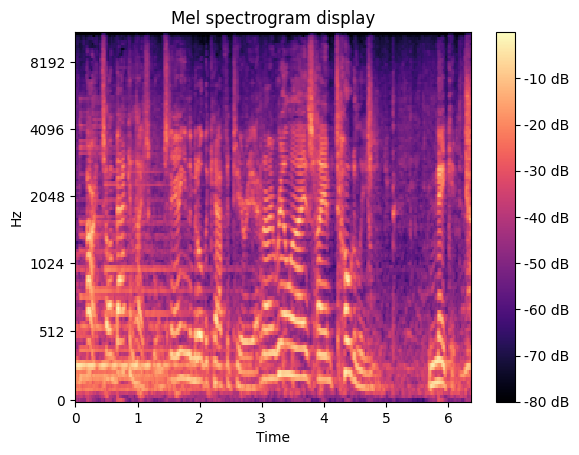

In [33]:
example = wav_data_path / 'dia1utt1.wav'

fig, ax = plt.subplots()

y, sr = librosa.load(example)
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

ordinary spectogram

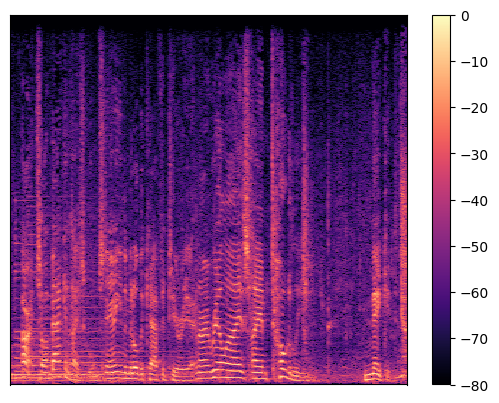

In [32]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [38]:
# compute mel specogram and resize to std size
def to_mel_spectogram(file, target_shape=(128,128)):
    path = wav_data_path / file
    audio_data, sample_rate = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_resized = sk_resize(mel_spect, target_shape)
    return mel_resized

data['mel'] = [to_mel_spectogram(fname) for fname in data['audio']]

print(data)

/Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/.venv/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
/var/folders/x1/dl1z_tcs7zb6pppfbf65d5sh0000gn/T/ipykernel_21351/3254807949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(path)
/Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/.venv/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


TimeoutError: [Errno 60] Operation timed out

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

X_train = data['mel']

labels = ['neutral', 'joy', 'surprise', 'anger', 'fear', 'disgust', 'sadness']
label_to_index = {label: index for index, label in enumerate(labels)}

train_idx_label = [label_to_index[label] for label in data['emotion']]
y_train = tf.one_hot(train_idx_label, len(labels)).numpy()

In [ ]:
num_classes = len(labels)

input_shape = X_train[0]
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  
])

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)